In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
df = pd.read_csv('spam_ham_dataset.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


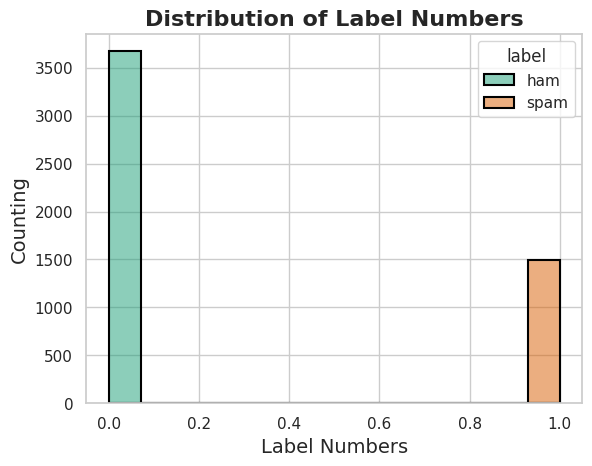

In [23]:
#visualizing the model
sns.set(style="whitegrid")
sns.histplot(data=df, x="label_num", hue="label", palette="Dark2", edgecolor="black", linewidth=1.5)

plt.title("Distribution of Label Numbers", fontsize=16, fontweight='bold')
plt.xlabel("Label Numbers", fontsize=14)
plt.ylabel("Counting", fontsize=14)

plt.show()

In [24]:
df.label_num.value_counts()

,count
label_num,
0,3672
1,1499


In [25]:
# Adjusting the values for better training
df.drop(df[df['label_num'] == 0].index[1499:],  inplace=True)
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5159,4381,spam,Subject: pictures\r\nstreamlined denizen ajar ...,1
5161,4979,spam,Subject: penny stocks are about timing\r\nnoma...,1
5162,4162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5164,4365,spam,Subject: slutty milf wants to meet you\r\ntake...,1


In [26]:
df.label_num.value_counts()

,count
label_num,
0,1499
1,1499


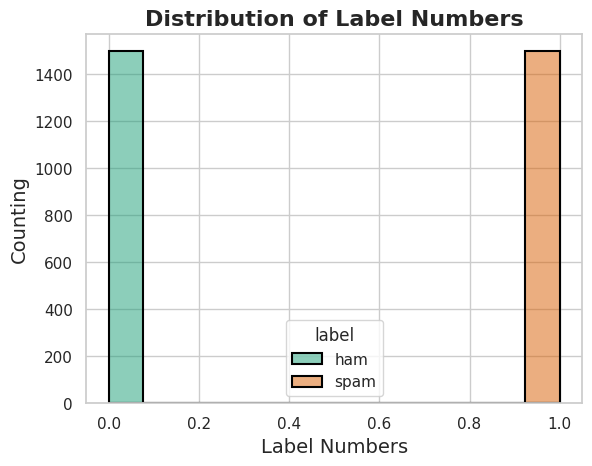

In [27]:
sns.set(style="whitegrid")  # Professional style with grid

# Use the 'Dark2' palette for professional color tones
sns.histplot(data=df, x="label_num", hue="label", palette="Dark2", edgecolor="black", linewidth=1.5)

plt.title("Distribution of Label Numbers", fontsize=16, fontweight='bold')
plt.xlabel("Label Numbers", fontsize=14)
plt.ylabel("Counting", fontsize=14)

plt.show()

In [28]:
#Removing the unnecessary values

df.drop(['Unnamed: 0','label'],axis=1,inplace=True)
df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5159,Subject: pictures\r\nstreamlined denizen ajar ...,1
5161,Subject: penny stocks are about timing\r\nnoma...,1
5162,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5164,Subject: slutty milf wants to meet you\r\ntake...,1


In [32]:
#create a function to preprocess the data

def clean_text(text):
    text = text.lower()

    # remove the puntuation
    text = ''.join([char for char in text if char not in string.punctuation])
    #tokenizing / splitting the text
    words = text.split()

    # Remove stopwords eg(the, etc) and apply stemming (the library we use)
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)

In [33]:
#converting text into vectors

tfidf_vectorizer = TfidfVectorizer()
X=tfidf_vectorizer.fit_transform(df["clean_text"])
y=df["label_num"]

In [34]:
X_train, X_text, y_train, y_test=train_test_split(X, y ,test_size=0.2,random_state=42, stratify=y)

In [35]:
#Defining the models

models= {
    "Naive Bayes":MultinomialNB(),
    "SVM":SVC(),
    "LogisticRegression":LogisticRegression()
}
best_results = {}
best_model_name = None
best_accuracy = 0.0

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Training  the model
    y_pred = model.predict(X_text)  # Predict on the test set

    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    best_results[name] = accuracy  # Store accuracy in the results dictionary

    # Display accuracy and classification report for the current model
    print(f"{name} Accuracy: {accuracy:.2f}")
    print("-----------------------------------------------------")
    print(classification_report(y_test, y_pred))

    # Check if this is the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

# Display the model with the best accuracy at the end
print("\nBest Model:")
print(f"{best_model_name} with Accuracy: {best_accuracy:.2f}")

Naive Bayes Accuracy: 0.98
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       300
           1       0.97      0.99      0.98       300

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

SVM Accuracy: 0.97
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       300
           1       0.94      1.00      0.97       300

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

LogisticRegression Accuracy: 0.96
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      

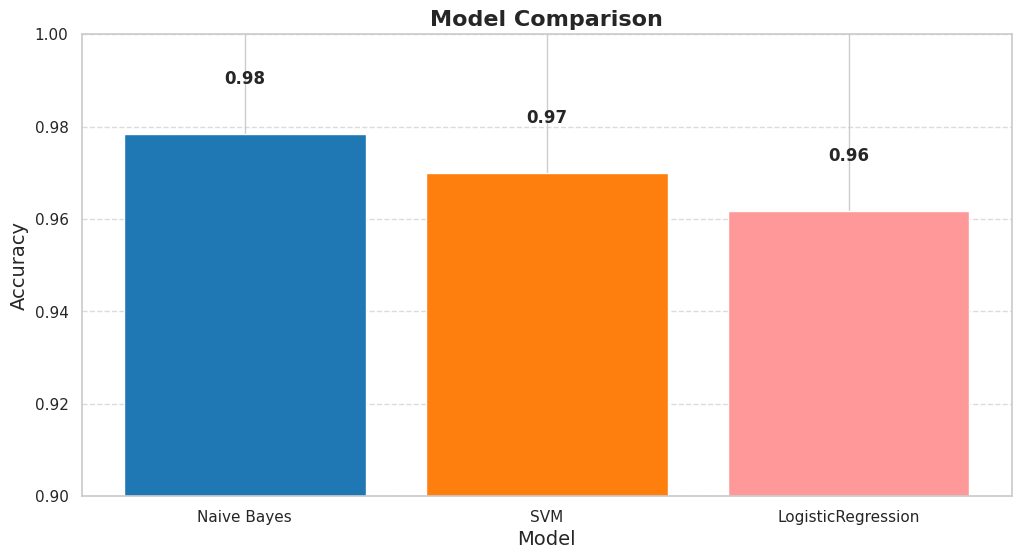

In [36]:
#visualizing the models accuracy

# Define a color palette
colors = ['#1f77b4', '#ff7f0e','#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']

plt.figure(figsize=(12, 6))
bars = plt.bar(best_results.keys(), best_results.values(), color=colors)
plt.title('Model Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()